In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import ADASYN

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

## Data Understanding

In [2]:
X = pd.read_csv('../data/traininginputs.csv')
y = pd.read_csv('../data/trainingoutput.csv')

In [3]:
X.head()

,PROC_TRACEINFO,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value
0,I-B-XA1207672-190429-00688,180.4,190.51,173.1,113.64,12.04,12.16,NaN,11.97,6.62,26.37,18.8,109.62,6.60
1,I-B-XA1207672-190828-00973,138.7,147.70,163.5,109.77,12.12,12.19,0.39,11.97,6.41,21.03,18.5,105.48,6.40
2,I-B-XA1207672-190712-03462,180.9,150.87,181.2,109.79,11.86,12.24,NaN,11.97,6.62,25.81,17.5,100.03,6.61
3,I-B-XA1207672-190803-00051,173.5,159.56,151.8,113.25,11.82,12.35,0.39,11.97,6.62,24.62,15.6,104.94,6.61
4,I-B-XA1207672-190508-03248,174.5,172.29,177.5,112.88,12.07,12.19,NaN,11.97,6.62,29.22,33.6,99.19,6.61


In [4]:
y.head()

,PROC_TRACEINFO,Binar OP130_Resultat_Global_v
0,I-B-XA1207672-190429-00688,0
1,I-B-XA1207672-190828-00973,0
2,I-B-XA1207672-190712-03462,0
3,I-B-XA1207672-190803-00051,0
4,I-B-XA1207672-190508-03248,0


In [5]:
df = X.merge(y, on='PROC_TRACEINFO')
df.head()

,PROC_TRACEINFO,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value,Binar OP130_Resultat_Global_v
0,I-B-XA1207672-190429-00688,180.4,190.51,173.1,113.64,12.04,12.16,NaN,11.97,6.62,26.37,18.8,109.62,6.60,0
1,I-B-XA1207672-190828-00973,138.7,147.70,163.5,109.77,12.12,12.19,0.39,11.97,6.41,21.03,18.5,105.48,6.40,0
2,I-B-XA1207672-190712-03462,180.9,150.87,181.2,109.79,11.86,12.24,NaN,11.97,6.62,25.81,17.5,100.03,6.61,0
3,I-B-XA1207672-190803-00051,173.5,159.56,151.8,113.25,11.82,12.35,0.39,11.97,6.62,24.62,15.6,104.94,6.61,0
4,I-B-XA1207672-190508-03248,174.5,172.29,177.5,112.88,12.07,12.19,NaN,11.97,6.62,29.22,33.6,99.19,6.61,0


### Assessing Data Quality

#### Data Types

In [6]:
df.dtypes

PROC_TRACEINFO                      object
OP070_V_1_angle_value              float64
OP090_SnapRingPeakForce_value      float64
OP070_V_2_angle_value              float64
OP120_Rodage_I_mesure_value        float64
OP090_SnapRingFinalStroke_value    float64
OP110_Vissage_M8_torque_value      float64
OP100_Capuchon_insertion_mesure    float64
OP120_Rodage_U_mesure_value        float64
OP070_V_1_torque_value             float64
OP090_StartLinePeakForce_value     float64
OP110_Vissage_M8_angle_value       float64
OP090_SnapRingMidPointForce_val    float64
OP070_V_2_torque_value             float64
Binar OP130_Resultat_Global_v        int64
dtype: object

All the variables have the appropriate data types.

#### Duplicate Values

In [7]:
df.duplicated().sum()

0

There are no duplicate values in the data.

#### Missing Values

In [8]:
df.isnull().sum()

PROC_TRACEINFO                         0
OP070_V_1_angle_value                  0
OP090_SnapRingPeakForce_value          0
OP070_V_2_angle_value                  0
OP120_Rodage_I_mesure_value            0
OP090_SnapRingFinalStroke_value        0
OP110_Vissage_M8_torque_value          0
OP100_Capuchon_insertion_mesure    18627
OP120_Rodage_U_mesure_value            0
OP070_V_1_torque_value                 0
OP090_StartLinePeakForce_value         0
OP110_Vissage_M8_angle_value           0
OP090_SnapRingMidPointForce_val        0
OP070_V_2_torque_value                 0
Binar OP130_Resultat_Global_v          0
dtype: int64

In [9]:
df.OP100_Capuchon_insertion_mesure.isnull().sum()/len(df)

0.5396784006953499

The dataset has only one column with about 54% missing values - `OP100_Capuchon_insertion_mesure`. Let's see if the missing values have any correlation with the target variable.

In [10]:
df['missing_capuchon'] = df['OP100_Capuchon_insertion_mesure'].isnull()
df.groupby('Binar OP130_Resultat_Global_v')['missing_capuchon'].value_counts(normalize=True).unstack('Binar OP130_Resultat_Global_v')

Binar OP130_Resultat_Global_v,0,1
missing_capuchon,,
False,0.458726,0.639344
True,0.541274,0.360656


<Axes: xlabel='missing_capuchon'>

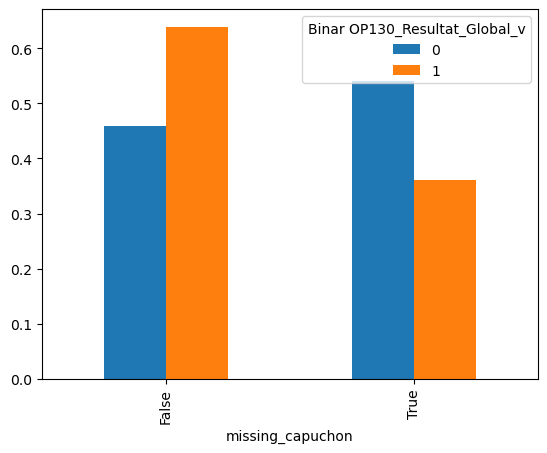

In [11]:
g= _
g.plot.bar()

The analysis above suggests that there are fewer defects when the `OP100_Capuchon_insertion_mesure` value is missing. This suggests that there is a correlation between missing `OP100_Capuchon_insertion_mesure` values and the number of defects. To check if this observation is statistically significant, a chi-square test for independence will be performed.

In [12]:
cross_tab = df.groupby('Binar OP130_Resultat_Global_v')['missing_capuchon'].value_counts().unstack('Binar OP130_Resultat_Global_v')

In [13]:
from scipy.stats import chi2_contingency

# Perform the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(cross_tab)

print(f'chi2: {chi2} \np_value: {p_value}')

chi2: 38.97479186573331 
p_value: 4.2931344485710856e-10


Since the p_value is less than 0.05, we reject the null hypothesis which suggests that the defects are independent of the missing capuchon values. Hence our earlier observation is statistically significant.

### Univariate Analysis

In [14]:
df.describe(include='all')

,PROC_TRACEINFO,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value,Binar OP130_Resultat_Global_v,missing_capuchon
count,34515,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,15888.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515
unique,34515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,I-B-XA1207672-190429-00688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18627
mean,NaN,159.906922,156.915055,159.618236,113.350222,11.970190,12.256785,0.388173,11.971027,6.548403,23.630152,17.878398,97.700978,6.550867,0.008837,NaN
std,NaN,15.662650,11.271492,15.091490,3.528522,0.169873,0.065319,0.024425,0.003050,0.097602,2.546341,6.785079,6.837714,0.094814,0.093589,NaN
min,NaN,101.800000,0.000000,82.000000,99.990000,0.000000,12.030000,0.240000,11.970000,5.670000,0.000000,6.300000,0.000000,5.740000,0.000000,NaN
25%,NaN,148.700000,149.210000,149.400000,111.040000,11.850000,12.210000,0.380000,11.970000,6.410000,22.280000,13.500000,94.310000,6.420000,0.000000,NaN
50%,NaN,158.000000,156.180000,158.700000,113.160000,12.040000,12.260000,0.390000,11.970000,6.610000,23.880000,16.400000,98.500000,6.610000,0.000000,NaN
75%,NaN,169.300000,164.380000,168.900000,115.380000,12.080000,12.300000,0.410000,11.970000,6.620000,25.290000,20.200000,102.230000,6.610000,0.000000,NaN


From the summary statistics above, the input features seem to be on varying numerical scales. Hence, there is a need to perform scaling before any machine learning model is trained on the data.

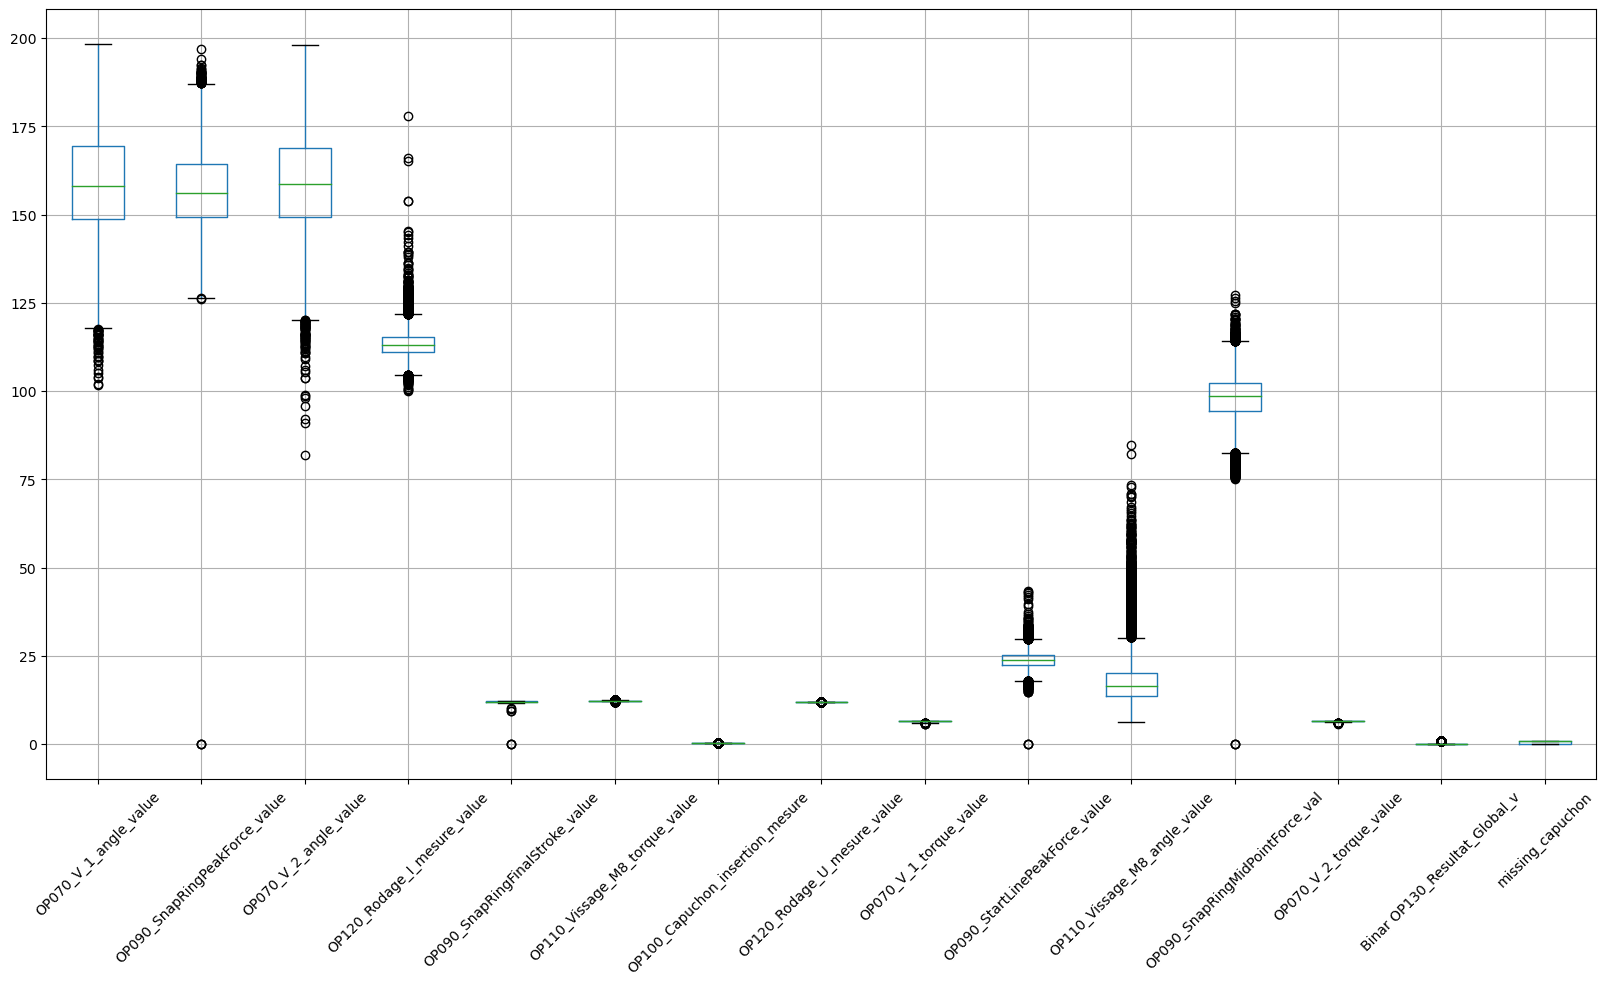

In [15]:
df.boxplot(figsize=(20, 10))
plt.xticks(rotation = 45);

The varying scale is more evident from the boxplot. Generally, values representing measured angles for the screwer have a higher range. Also, the peak force, the mid force of the snap ring insertion as well as the rodage intensity have a higher range. The scale of the angular measurements can be reduced by applying a sine transformation while the other features can be scaled using a standard scaler.
<br>
The boxplots also reveal the presence of outliers. During the bivariate analysis, we will investigate if this outliers have any correlation with the target variable i.e. affect the chances of defects occuring or not.

In [16]:
num_cols = df.select_dtypes(include=np.number)

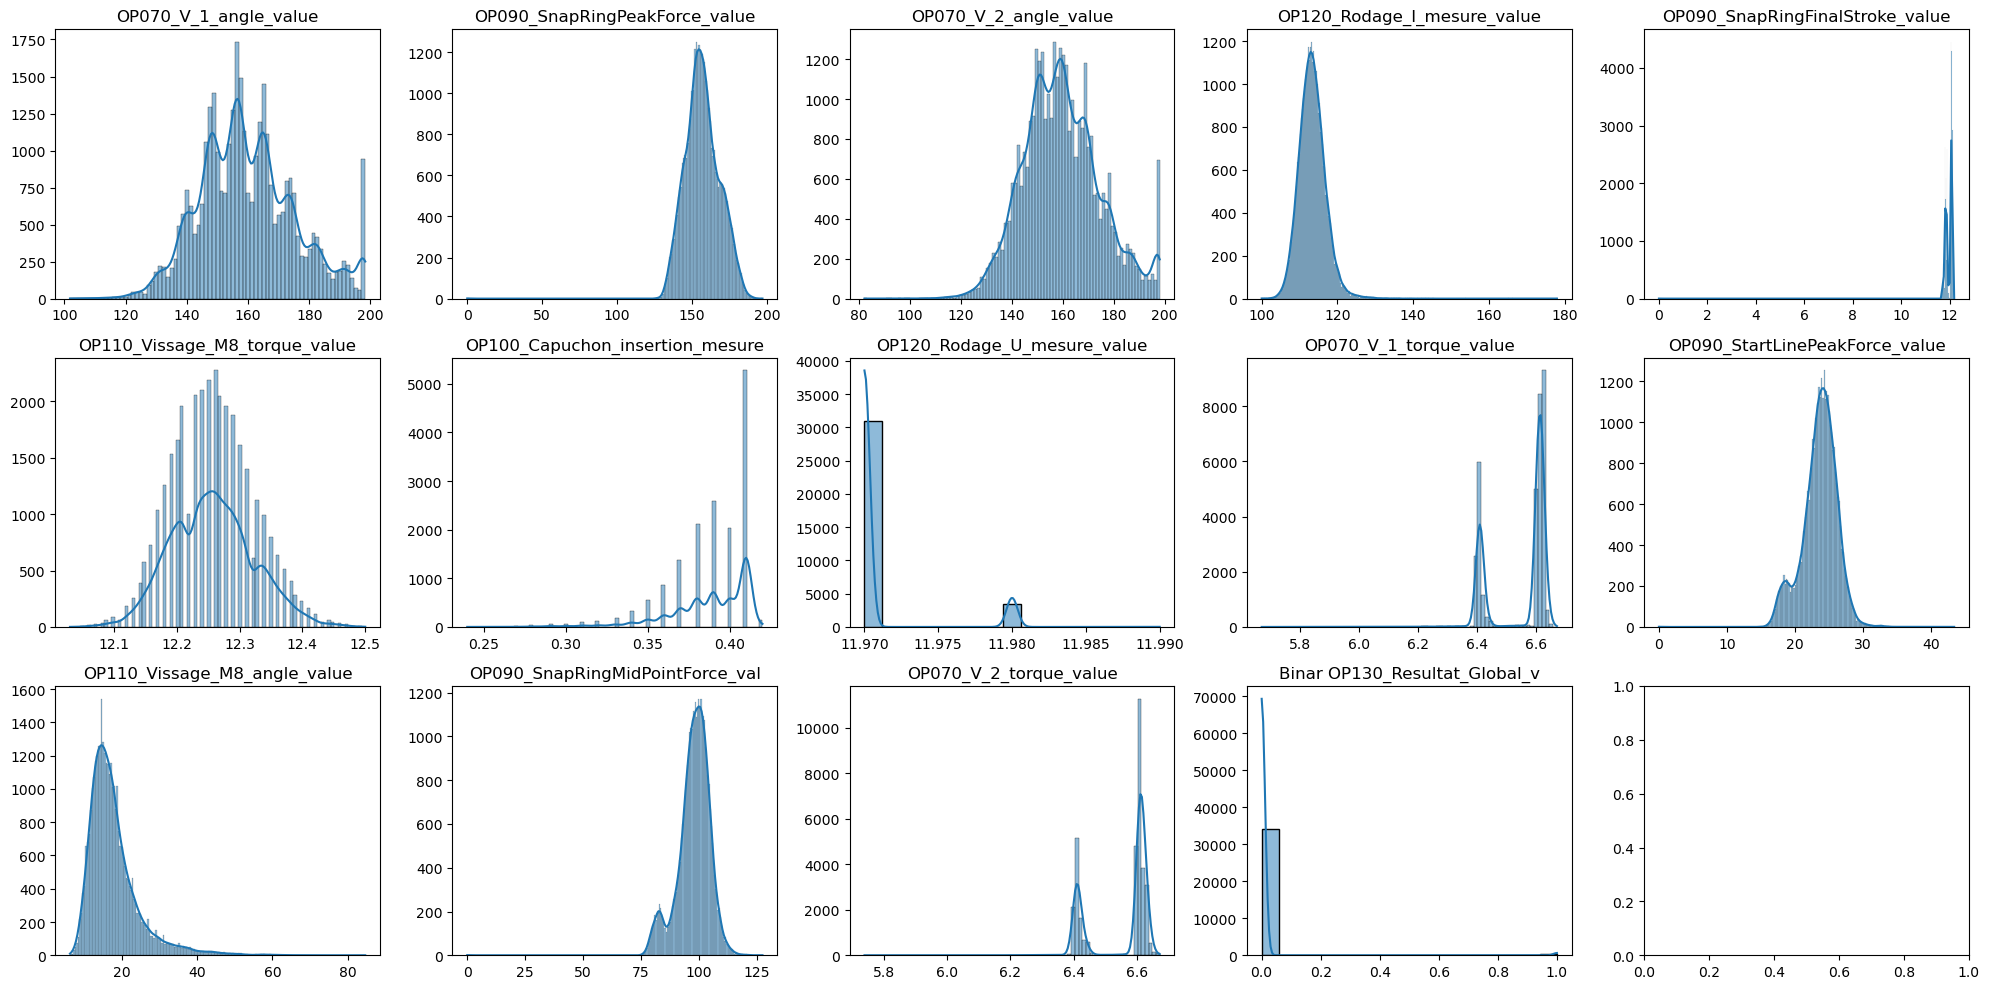

In [17]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(num_cols):
    sns.histplot(data=df, x = col, kde=True, ax=axes[i])
    axes[i].set(xlabel=None)
    axes[i].set(ylabel=None)
    axes[i].set_title(col)

plt.tight_layout()
plt.show();

The histograms reveal a bimodal distribution for torque input features. This could be reflective of varying behaviours for different clusters in the data. This patterns should become more evident in the bivariate analysis. Some outliers are also apparent through this histograms, given the skewed nature of the distribution.

In [18]:
def add_data_labels_bar(x,y, pos):
    y_total = y.sum()
    for i in range(len(x)):
        plt.text(i, y[i] + pos, f'{y[i]:,} ({round((y[i] * 100)/ y_total, 1)}%)', ha = 'center')

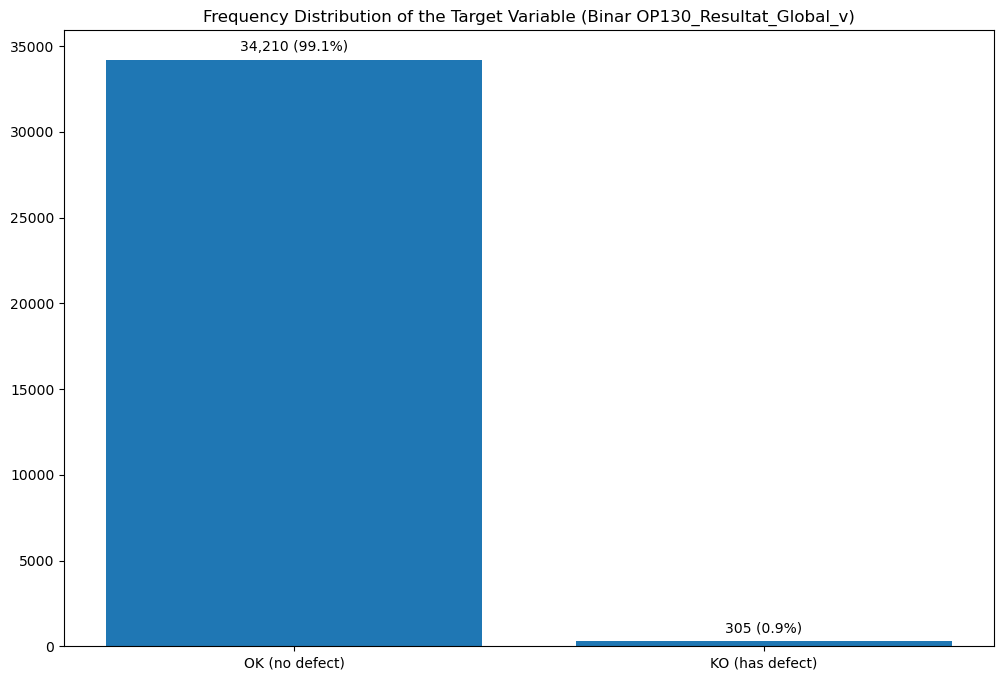

In [19]:
g = df['Binar OP130_Resultat_Global_v'].value_counts()
plt.figure(figsize=[12, 8])
plt.bar(g.index, g.values)
add_data_labels_bar(g.index, g.values, 500)
plt.xticks([0, 1], labels=['OK (no defect)', 'KO (has defect)'])
plt.xlabel(None)
plt.title('Frequency Distribution of the Target Variable (Binar OP130_Resultat_Global_v)')
plt.show();

From the plot above, it can be observed that the distribution of the target variable is highly imbalanced. This has to be considered when preparing the data for modeling, selecting algorithms and tuning hyperparameters.

### Bivariate Analysis

In [20]:
df.corr(numeric_only=True)

,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value,Binar OP130_Resultat_Global_v,missing_capuchon
OP070_V_1_angle_value,1.000000,0.008887,0.186781,0.035003,-0.087910,-0.017578,-0.024779,-0.007284,-0.012960,0.057592,0.014374,0.066924,0.073814,-0.012793,0.086510
OP090_SnapRingPeakForce_value,0.008887,1.000000,0.038399,0.055235,0.076451,-0.134780,-0.193211,0.135288,0.489633,0.336620,0.106753,0.345139,0.481550,-0.007290,0.518705
OP070_V_2_angle_value,0.186781,0.038399,1.000000,0.036301,-0.060931,-0.030284,0.005722,0.003245,0.059178,0.047190,0.017727,0.050193,0.017812,-0.006342,0.121070
OP120_Rodage_I_mesure_value,0.035003,0.055235,0.036301,1.000000,0.060014,-0.046313,0.053972,-0.118751,0.034240,0.002962,0.025043,0.046556,0.034342,0.003763,0.068255
OP090_SnapRingFinalStroke_value,-0.087910,0.076451,-0.060931,0.060014,1.000000,-0.095903,0.307973,-0.022536,-0.380948,-0.381450,0.022764,-0.081412,-0.407915,0.015148,-0.131917
OP110_Vissage_M8_torque_value,-0.017578,-0.134780,-0.030284,-0.046313,-0.095903,1.000000,-0.023820,-0.031115,-0.076357,0.009997,-0.445953,-0.057760,-0.073071,-0.002984,-0.104997
OP100_Capuchon_insertion_mesure,-0.024779,-0.193211,0.005722,0.053972,0.307973,-0.023820,1.000000,-0.087928,-0.522733,-0.209883,-0.094913,0.016094,-0.532577,0.032212,NaN
OP120_Rodage_U_mesure_value,-0.007284,0.135288,0.003245,-0.118751,-0.022536,-0.031115,-0.087928,1.000000,0.169246,0.087487,0.013814,0.057027,0.172109,-0.010492,0.189151
OP070_V_1_torque_value,-0.012960,0.489633,0.059178,0.034240,-0.380948,-0.076357,-0.522733,0.169246,1.000000,0.543089,0.112377,0.334814,0.896698,-0.037438,0.665472
OP090_StartLinePeakForce_value,0.057592,0.336620,0.047190,0.002962,-0.381450,0.009997,-0.209883,0.087487,0.543089,1.000000,0.043943,0.620728,0.562435,0.010720,0.350268


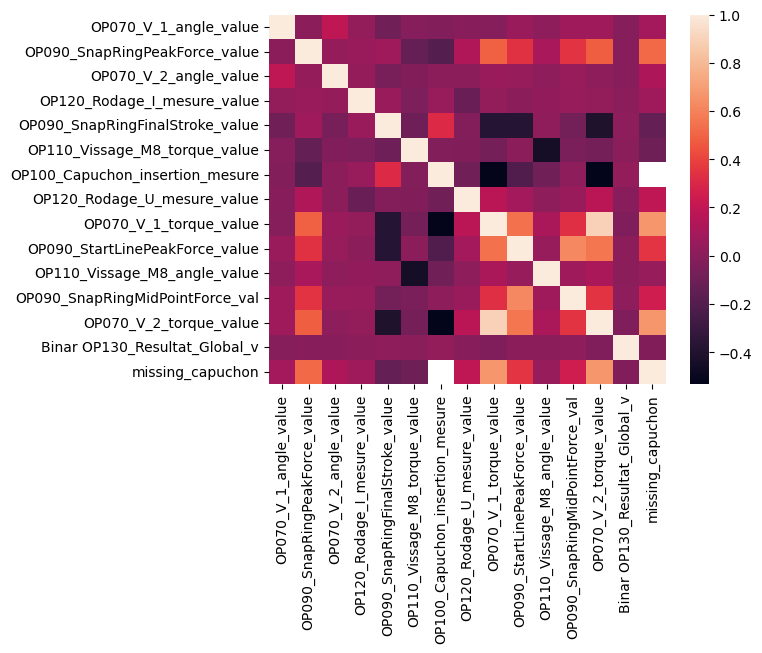

In [21]:
sns.heatmap(df.corr(numeric_only=True));

The correlation heatmap above reveals that most of the input features are not linearly correlated with the target variable. This suggests that the algorithms to be selected for model development should be able to capture non-linear relationships. The correlation heatmap also reveals that some input features seem to be correlated with one another.For instance, `OP070_V_1_torque_value` and `OP070_V_2_torque_value` seem to have moderate positive correlation with the snap ring forces and capuchon insertion measure.

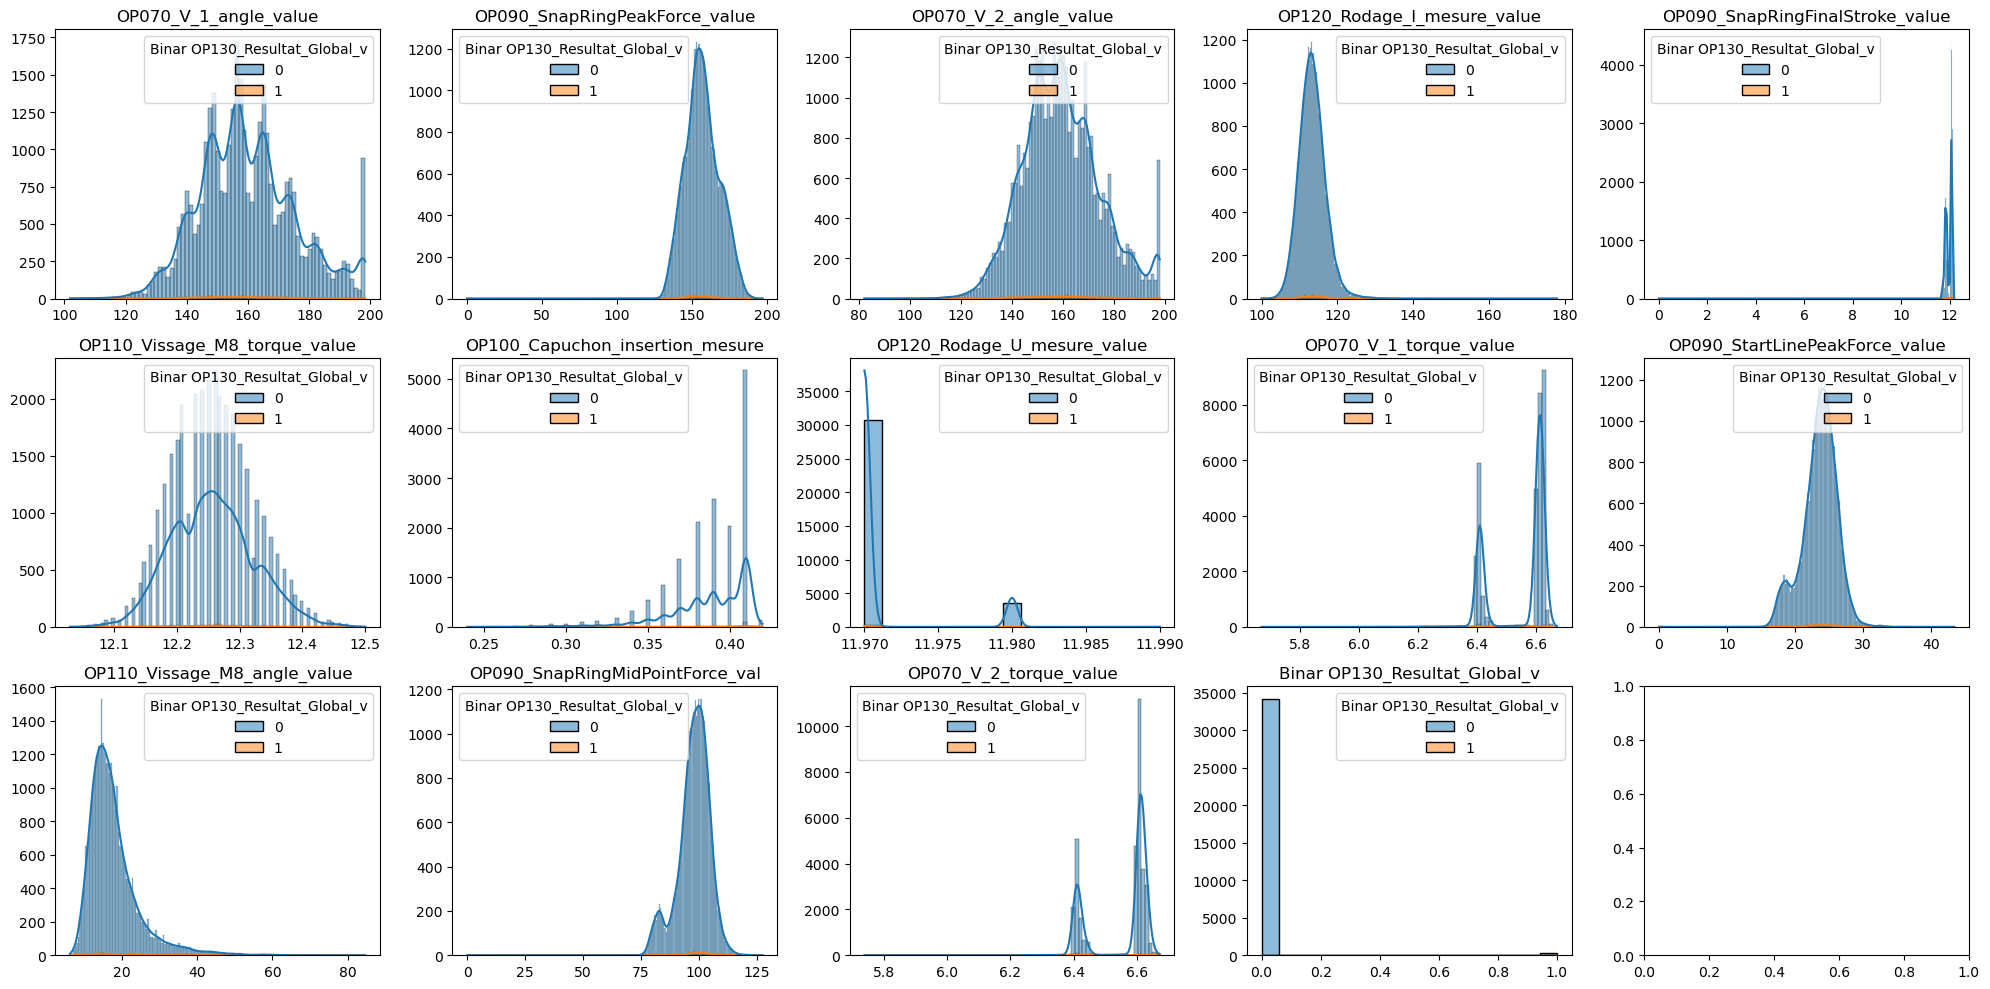

In [22]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(num_cols):
    sns.histplot(data=df, x = col, hue= 'Binar OP130_Resultat_Global_v', kde=True, ax=axes[i])
    axes[i].set(xlabel=None)
    axes[i].set(ylabel=None)
    axes[i].set_title(col)

plt.tight_layout()
plt.show();

Because of the severe class imbalance, the minority class isn't well represented in the plots. However, it can be observed that the classes overlap and cannot be easily distinguished within these plots.

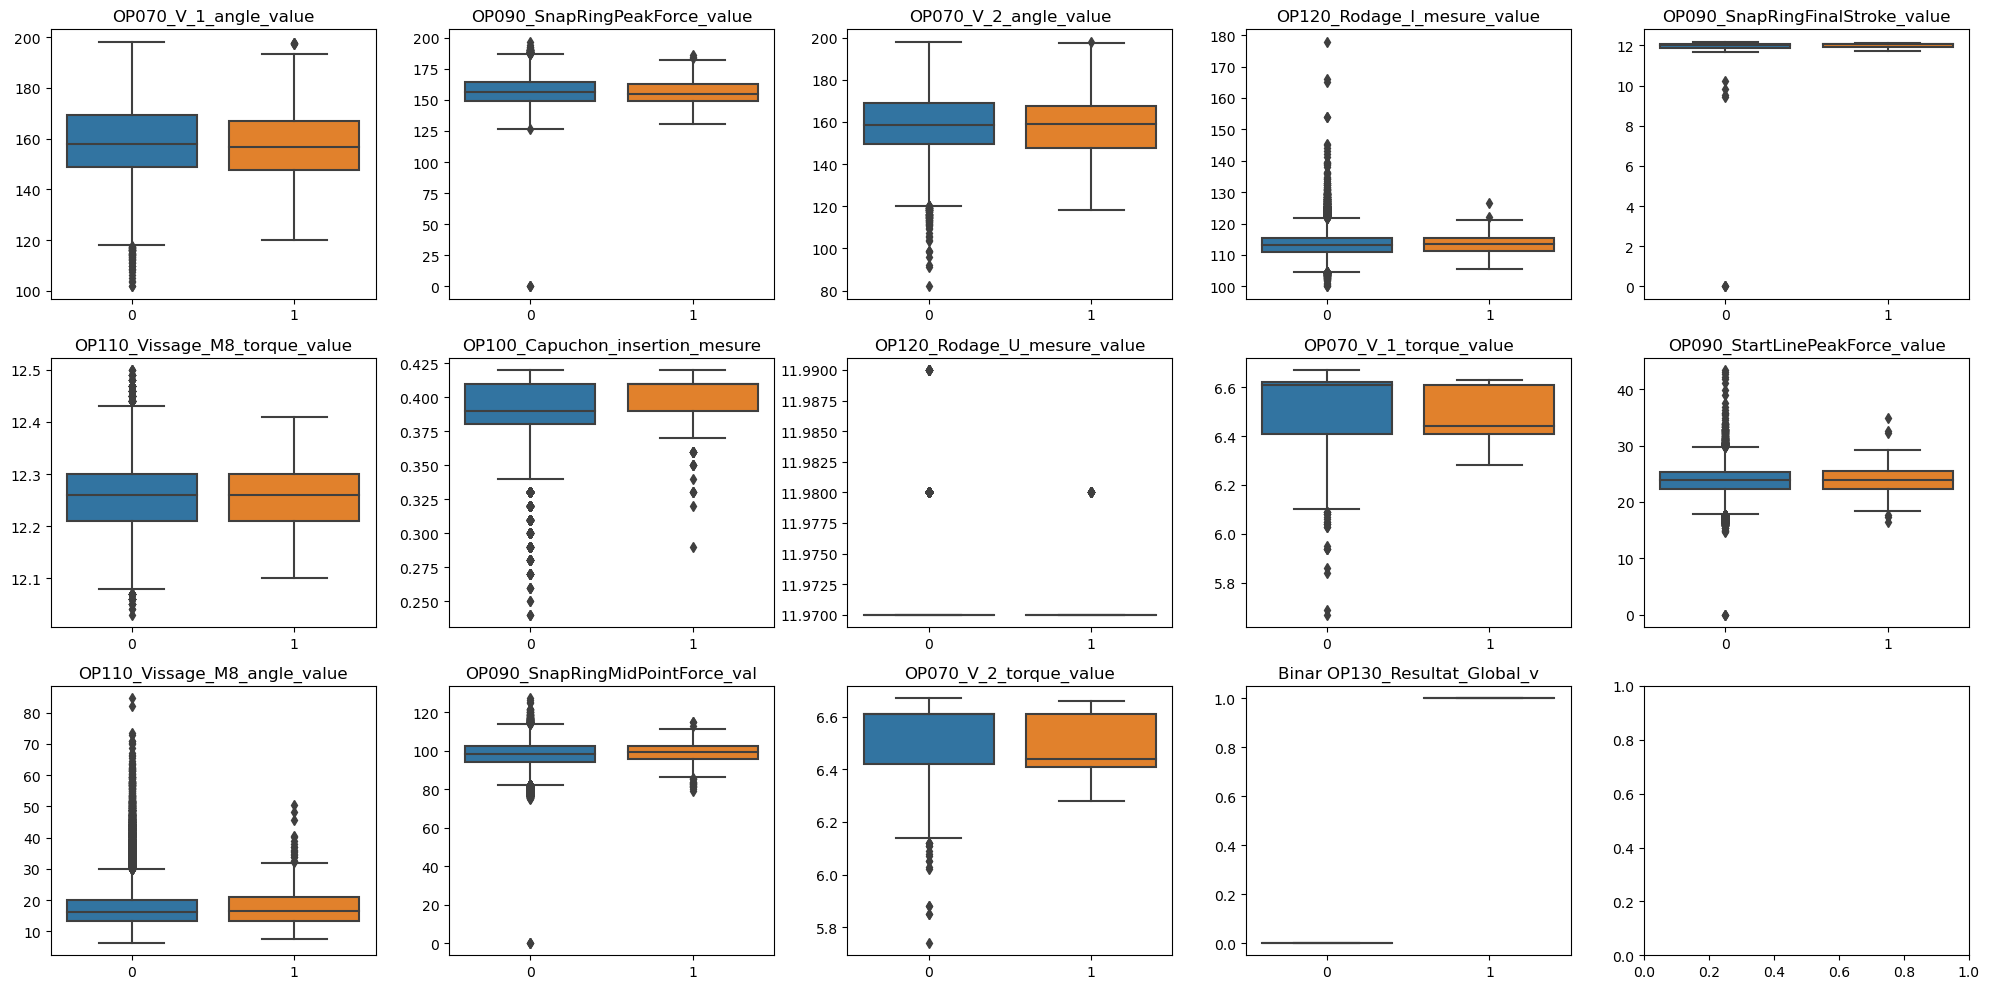

In [23]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, y = col, x = 'Binar OP130_Resultat_Global_v', ax=axes[i])
    axes[i].set(xlabel=None)
    axes[i].set(ylabel=None)
    axes[i].set_title(col)

plt.tight_layout()
plt.show();

These boxplots further reveal the overlap between the classes. This emphasizes the need to select advanced machine learning algorithms that can distinguish between the classes.

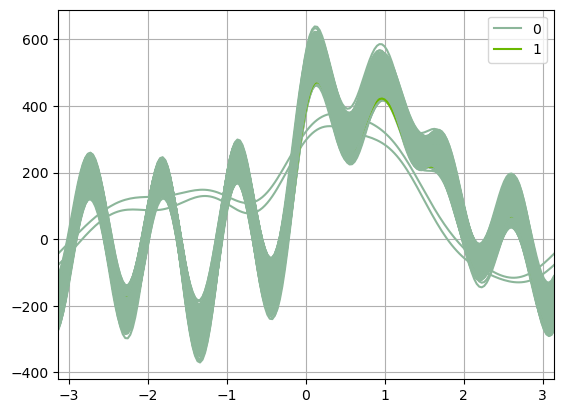

In [24]:
# Creating Andrews curves
x = pd.plotting.andrews_curves(df.drop(columns='PROC_TRACEINFO'), 'Binar OP130_Resultat_Global_v')
# plotting the Curve
x.plot()

# Display
plt.show();

In summary, the following issues have been identified during the data understanding phase:

**Data Quality Issues**
* The `OP100_Capuchon_insertion_mesure` has over 54% missing values. There is a significant relationship between these missing capuchon values and products with defects.
* Most of the features contain outliers and so far, no pattern has been detected with these outliers.

**Data Exploration Notes**
* The target variable has a severe class imbalance.
* Some of the predictor variables have bimodal distributions and some others are skewed because of the presence of outliers.
* The predictor variables are on different numerical scales and will need to be scaled before modelling.
* The classes seem to be linearly inseperable as a there eas a lot of overlap between the classes.
* Most of the predictor variables showed little linear correlation with the target variable. However, some exhibited correlation with one another.

## Data Preparation

### Dealing with Missing Values

As noted in the data understanding phase, the presence or absence of `OP100_Capuchon_insertion_mesure` has a significant influence on the occurence of defects. Hence, a new feature that indicates the presence or absence of this value, `missing_capuchon` was created. With this, the `OP100_Capuchon_insertion_mesure` feature can be dropped.

In [25]:
df.drop(columns='OP100_Capuchon_insertion_mesure', inplace=True)

### Dealing with Outliers

In [26]:
outlier_cols = df.drop(columns=['PROC_TRACEINFO', 'Binar OP130_Resultat_Global_v', 'missing_capuchon'])

for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

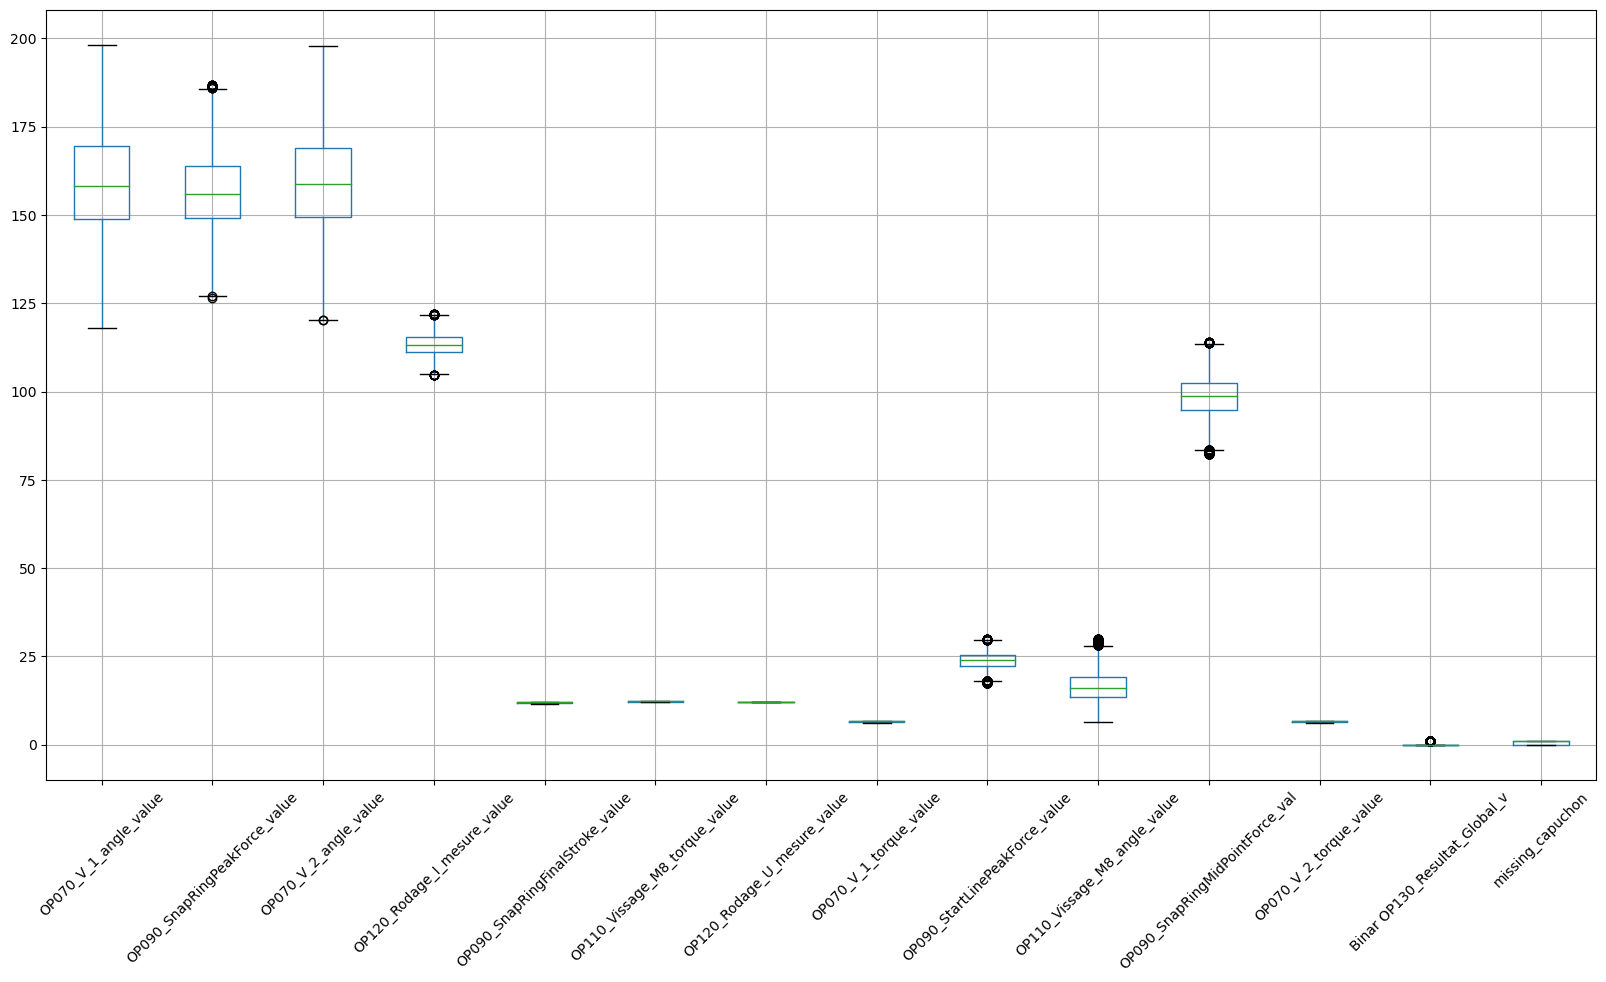

In [27]:
df.boxplot(figsize=(20, 10))
plt.xticks(rotation = 45);

### Encode Categorical Features

In [28]:
df['missing_capuchon'] = np.where(df['missing_capuchon']== True, 1, 0)

### Split Data into Train and Test Sets

In [29]:
X = df.drop(columns=['PROC_TRACEINFO', 'Binar OP130_Resultat_Global_v'])
y = df['Binar OP130_Resultat_Global_v']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

### Scaling Numerical Features

In [30]:
angular_features = [col for col in df.columns if 'angle' in col]
angular_features

['OP070_V_1_angle_value',
 'OP070_V_2_angle_value',
 'OP110_Vissage_M8_angle_value']

In [31]:
other_num_features = [col for col in df.drop(columns=['PROC_TRACEINFO', 'Binar OP130_Resultat_Global_v', 'missing_capuchon']).columns if col not in angular_features]
other_num_features

['OP090_SnapRingPeakForce_value',
 'OP120_Rodage_I_mesure_value',
 'OP090_SnapRingFinalStroke_value',
 'OP110_Vissage_M8_torque_value',
 'OP120_Rodage_U_mesure_value',
 'OP070_V_1_torque_value',
 'OP090_StartLinePeakForce_value',
 'OP090_SnapRingMidPointForce_val',
 'OP070_V_2_torque_value']

In [32]:
# scaling angular features
for col in angular_features:
  X_train[col] = X_train[col].apply(lambda x: np.sin(x))
  X_test[col] = X_test[col].apply(lambda x: np.sin(x))

X_train[angular_features].head()

,OP070_V_1_angle_value,OP070_V_2_angle_value,OP110_Vissage_M8_angle_value
17750,0.468530,0.647585,0.650288
34274,-0.665625,-0.889198,-0.999990
10209,0.861410,0.252105,-0.750987
34356,0.647585,-0.726533,-0.711785
6039,0.994917,0.185655,-0.271761


In [33]:
# scaling other numerical features
scaler = RobustScaler()
scaler.fit(X_train[other_num_features])

scaled_train = scaler.transform(X_train[other_num_features])
scaled_test = scaler.transform(X_test[other_num_features])

X_train_scaled = pd.DataFrame(scaled_train, columns=other_num_features, index=X_train.index)
X_test_scaled = pd.DataFrame(scaled_test, columns=other_num_features, index=X_test.index)

In [34]:
X_train.drop(columns=other_num_features, inplace=True)
X_test.drop(columns=other_num_features, inplace=True)
X_train = pd.concat([X_train, X_train_scaled], axis=1)
X_test = pd.concat([X_test, X_test_scaled], axis=1)

In [35]:
X_train.head()

,OP070_V_1_angle_value,OP070_V_2_angle_value,OP110_Vissage_M8_angle_value,missing_capuchon,OP090_SnapRingPeakForce_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value
17750,0.468530,0.647585,0.650288,0,0.017699,0.056604,-0.956522,0.444444,0.0,0.000000,-0.475524,-0.790451,-0.052632
34274,-0.665625,-0.889198,-0.999990,1,1.953710,-0.379717,0.043478,-0.222222,0.0,0.000000,0.258741,0.917772,0.000000
10209,0.861410,0.252105,-0.750987,0,0.143635,1.245283,0.217391,0.444444,0.0,-0.952381,-0.237762,-0.636605,-1.052632
34356,0.647585,-0.726533,-0.711785,1,1.397549,-0.863208,0.043478,-0.111111,0.0,0.047619,-0.597902,-0.030504,-0.052632
6039,0.994917,0.185655,-0.271761,0,-0.199455,-0.669811,-0.043478,1.333333,0.0,-0.904762,0.447552,0.675066,-1.052632


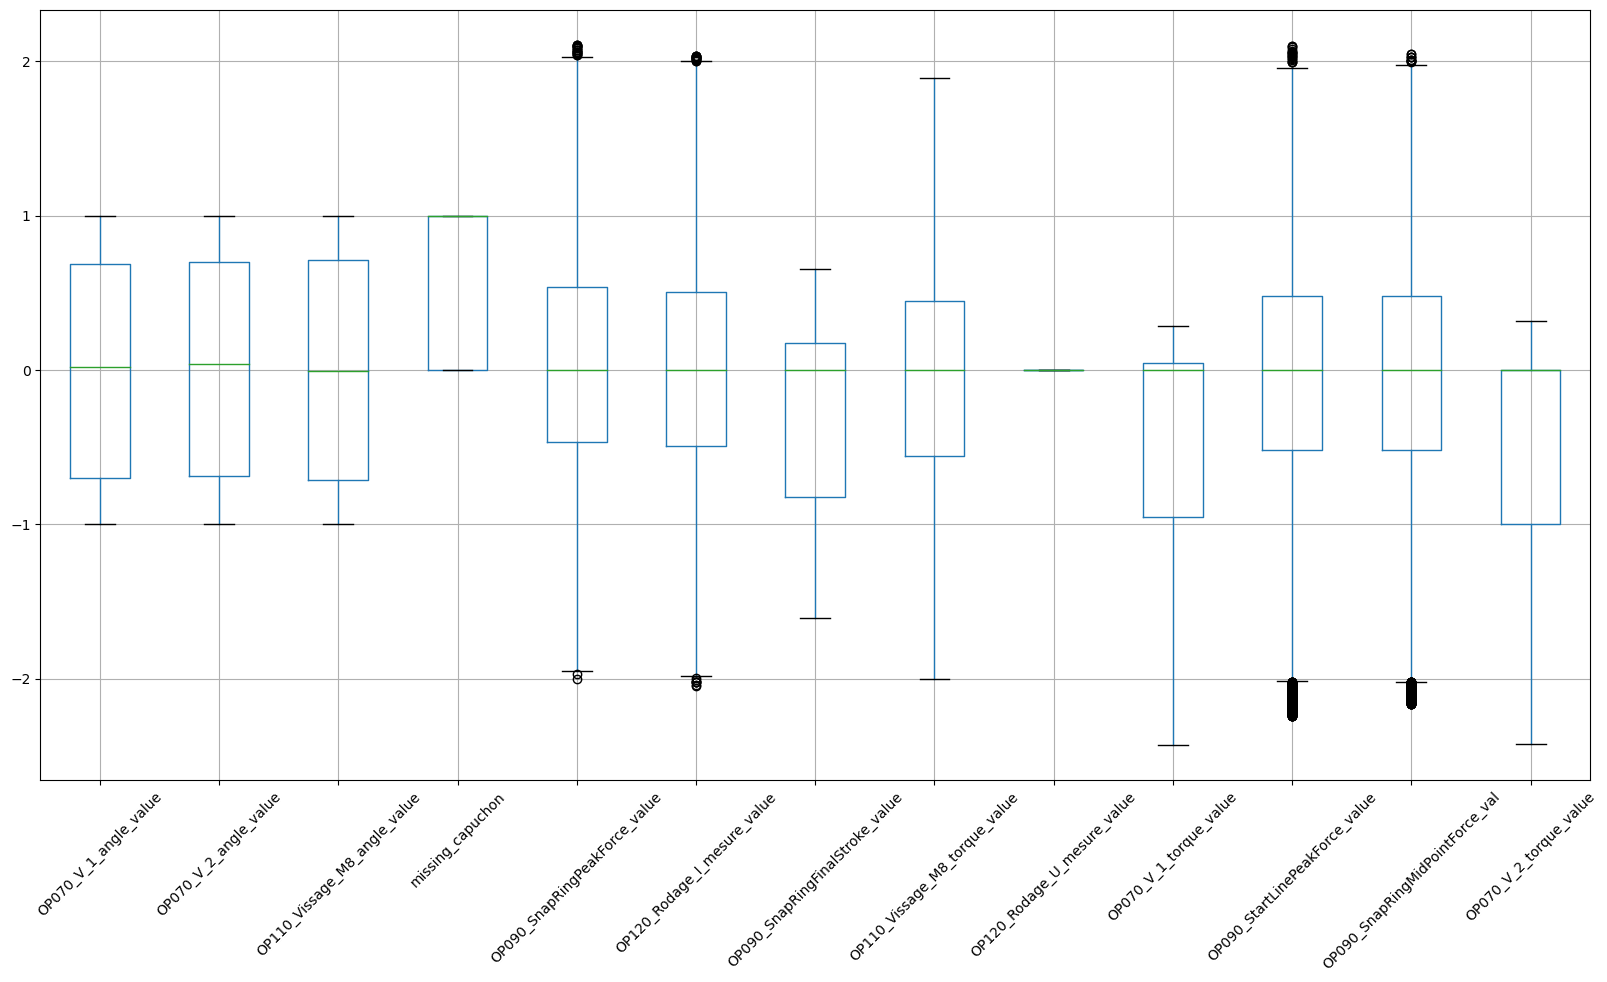

In [36]:
X_train.boxplot(figsize=(20, 10))
plt.xticks(rotation = 45);

### Balancing the Data

In [37]:
X_train_bal, y_train_bal = ADASYN().fit_resample(X_train, y_train)

As for new features, only the `missing_capuchon` feature was created. New features could not be derived from the torque and angle features because the author did not have sufficient domain knowledge to understand how these features interact. Experimenting with relationships such as finding ratios, differences or products seemed to have a weaker correlation with the target variable.

## Modelling

### Support Vector Classifier

In [38]:
svc = SVC(kernel='rbf', C=1, gamma='auto', class_weight='balanced')  # Using Radial Basis Function (RBF) kernel
svc.fit(X_train_bal, y_train_bal)

SVC(C=1, class_weight='balanced', gamma='auto')

In [39]:
y_pred_svc = svc.predict(X_test)
print(classification_report(y_test, y_pred_svc))
print(roc_auc_score(y_test, y_pred_svc))
confusion_matrix(y_test, y_pred_svc)

              precision    recall  f1-score   support

           0       0.99      0.75      0.86      5283
           1       0.02      0.40      0.03        50

    accuracy                           0.75      5333
   macro avg       0.50      0.58      0.44      5333
weighted avg       0.98      0.75      0.85      5333

0.5758281279575997


array([[3971, 1312],
       [  30,   20]], dtype=int64)

In [40]:
svc_sigmoid = SVC(kernel='sigmoid', C=1, gamma='auto', class_weight='balanced')  # Using Sigmoid kernel
svc_sigmoid.fit(X_train_bal, y_train_bal)

SVC(C=1, class_weight='balanced', gamma='auto', kernel='sigmoid')

In [41]:
y_pred_sig = svc_sigmoid.predict(X_test)
print(classification_report(y_test, y_pred_sig))
print(roc_auc_score(y_test, y_pred_sig))
confusion_matrix(y_test, y_pred_sig)

              precision    recall  f1-score   support

           0       0.99      0.51      0.67      5283
           1       0.01      0.70      0.03        50

    accuracy                           0.51      5333
   macro avg       0.50      0.60      0.35      5333
weighted avg       0.99      0.51      0.67      5333

0.6034544766231308


array([[2678, 2605],
       [  15,   35]], dtype=int64)

In [42]:
y_pred_sig = svc_sigmoid.predict(X_test)
print(classification_report(y_test, y_pred_sig))
print(roc_auc_score(y_test, y_pred_sig))
confusion_matrix(y_test, y_pred_sig)

              precision    recall  f1-score   support

           0       0.99      0.51      0.67      5283
           1       0.01      0.70      0.03        50

    accuracy                           0.51      5333
   macro avg       0.50      0.60      0.35      5333
weighted avg       0.99      0.51      0.67      5333

0.6034544766231308


array([[2678, 2605],
       [  15,   35]], dtype=int64)

In [43]:
svc_poly = SVC(kernel='poly', degree=3, C=1, gamma='auto', class_weight='balanced')  # Using Poly kernel
svc_poly.fit(X_train_bal, y_train_bal)

SVC(C=1, class_weight='balanced', gamma='auto', kernel='poly')

In [44]:
y_pred_poly = svc_poly.predict(X_test)
print(classification_report(y_test, y_pred_poly))
print(roc_auc_score(y_test, y_pred_poly))
confusion_matrix(y_test, y_pred_poly)

              precision    recall  f1-score   support

           0       0.99      0.68      0.81      5283
           1       0.01      0.48      0.03        50

    accuracy                           0.68      5333
   macro avg       0.50      0.58      0.42      5333
weighted avg       0.98      0.68      0.80      5333

0.582040507287526


array([[3614, 1669],
       [  26,   24]], dtype=int64)

### Random Forest Classifier

In [45]:
rf = RandomForestClassifier(random_state=1, class_weight='balanced')
rf.fit(X_train_bal, y_train_bal)

RandomForestClassifier(class_weight='balanced', random_state=1)

In [46]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print(roc_auc_score(y_test, y_pred_rf))
confusion_matrix(y_test, y_pred_rf)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5283
           1       0.00      0.00      0.00        50

    accuracy                           0.99      5333
   macro avg       0.50      0.50      0.50      5333
weighted avg       0.98      0.99      0.99      5333

0.5


c:\Users\Owner\anaconda3\envs\genai\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Owner\anaconda3\envs\genai\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Owner\anaconda3\envs\genai\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[5283,    0],
       [  50,    0]], dtype=int64)

### XGBoost Classifier

In [47]:
xgb = XGBClassifier()
xgb.fit(X_train_bal, y_train_bal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [48]:
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))
print(roc_auc_score(y_test, y_pred_xgb))
confusion_matrix(y_test, y_pred_xgb)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5283
           1       0.00      0.00      0.00        50

    accuracy                           0.99      5333
   macro avg       0.50      0.50      0.50      5333
weighted avg       0.98      0.99      0.99      5333

0.4999053568048457


array([[5282,    1],
       [  50,    0]], dtype=int64)

### Naive Bayes Classifier

In [49]:
nb = GaussianNB()
nb.fit(X_train_bal, y_train_bal)

GaussianNB()

In [50]:
y_pred_nb = nb.predict(X_test)
print(classification_report(y_test, y_pred_nb))
print(roc_auc_score(y_test, y_pred_nb))
confusion_matrix(y_test, y_pred_nb)

              precision    recall  f1-score   support

           0       0.99      0.72      0.84      5283
           1       0.02      0.58      0.04        50

    accuracy                           0.72      5333
   macro avg       0.51      0.65      0.44      5333
weighted avg       0.99      0.72      0.83      5333

0.6519155782699224


array([[3824, 1459],
       [  21,   29]], dtype=int64)

### Decision Tree Classifier

In [51]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train_bal, y_train_bal)

DecisionTreeClassifier(random_state=1)

In [52]:
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))
print(roc_auc_score(y_test, y_pred_dt))
confusion_matrix(y_test, y_pred_dt)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5283
           1       0.01      0.02      0.01        50

    accuracy                           0.97      5333
   macro avg       0.50      0.50      0.50      5333
weighted avg       0.98      0.97      0.98      5333

0.5011035396554987


array([[5189,   94],
       [  49,    1]], dtype=int64)

In [57]:
# Read in Validation Data
X_val = pd.read_csv('../data/testinputs.csv')
X_val.drop(columns='PROC_TRACEINFO', inplace=True)
y_val = pd.read_csv('../data/testoutput.csv')
y_val = y_val['Binar_OP130_Resultat_Global_v']

In [58]:
# Apply preprocessing to predictor variables
X_val['missing_capuchon'] = X_val['OP100_Capuchon_insertion_mesure'].isnull()
X_val['missing_capuchon'] = np.where(X_val['missing_capuchon']== True, 1, 0)

X_val.drop(columns='OP100_Capuchon_insertion_mesure', inplace=True)

# scaling angular features
for col in angular_features:
  X_val[col] = X_val[col].apply(lambda x: np.sin(x))

scaled_val = scaler.transform(X_val[other_num_features])
X_val_scaled = pd.DataFrame(scaled_val, columns=other_num_features, index=X_val.index)
X_val.drop(columns=other_num_features, inplace=True)
X_val = pd.concat([X_val, X_val_scaled], axis=1)

In [59]:
y_pred = nb.predict(X_val)
print(f'AUROC:{roc_auc_score(y_val, y_pred)}')
print(classification_report(y_val, y_pred))

AUROC:0.6060863836856275
              precision    recall  f1-score   support

           0       0.99      0.77      0.87      7935
           1       0.02      0.44      0.03        66

    accuracy                           0.77      8001
   macro avg       0.50      0.61      0.45      8001
weighted avg       0.99      0.77      0.86      8001

